In [99]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
import matplotlib
import warnings
import itertools
import numpy as np
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm

matplotlib.rcParams['axes.labelsize']=14
matplotlib.rcParams['xtick.labelsize']=12
matplotlib.rcParams['ytick.labelsize']=12
matplotlib.rcParams['text.color']='k'




<Figure size 640x480 with 0 Axes>

In [3]:
df=pd.read_csv("D:/UEA/Kaggle Practice/SalesForecasting/train.csv")

In [4]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [5]:
#Time series Forecasting for furniture sales

In [7]:
df_furniture=df.loc[df['Category']=='Furniture']

In [8]:
df_furniture

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
5,6,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600
10,11,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9786,9787,US-2015-114377,05/11/2015,05/11/2015,Same Day,BG-11035,Barry Gonzalez,Consumer,United States,Hampton,Virginia,23666.0,South,FUR-CH-10004754,Furniture,Chairs,"Global Stack Chair with Arms, Black",149.9000
9787,9788,CA-2018-144491,27/03/2018,01/04/2018,Standard Class,CJ-12010,Caroline Jumper,Consumer,United States,Houston,Texas,77070.0,Central,FUR-BO-10001811,Furniture,Bookcases,"Atlantic Metals Mobile 5-Shelf Bookcases, Cust...",1023.3320
9788,9789,CA-2018-144491,27/03/2018,01/04/2018,Standard Class,CJ-12010,Caroline Jumper,Consumer,United States,Houston,Texas,77070.0,Central,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,600.5580
9790,9791,CA-2018-144491,27/03/2018,01/04/2018,Standard Class,CJ-12010,Caroline Jumper,Consumer,United States,Houston,Texas,77070.0,Central,FUR-CH-10001714,Furniture,Chairs,"Global Leather & Oak Executive Chair, Burgundy",211.2460


In [15]:
df_furniture.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [ ]:
#There is no null object in the dataframe.

In [17]:
df_furniture.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2078 entries, 0 to 9792
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2078 non-null   int64  
 1   Order ID       2078 non-null   object 
 2   Order Date     2078 non-null   object 
 3   Ship Date      2078 non-null   object 
 4   Ship Mode      2078 non-null   object 
 5   Customer ID    2078 non-null   object 
 6   Customer Name  2078 non-null   object 
 7   Segment        2078 non-null   object 
 8   Country        2078 non-null   object 
 9   City           2078 non-null   object 
 10  State          2078 non-null   object 
 11  Postal Code    2076 non-null   float64
 12  Region         2078 non-null   object 
 13  Product ID     2078 non-null   object 
 14  Category       2078 non-null   object 
 15  Sub-Category   2078 non-null   object 
 16  Product Name   2078 non-null   object 
 17  Sales          2078 non-null   float64
dtypes: float

In [25]:
df_furniture['Order Date']=df_furniture['Order Date'].astype({'Order Date':'datetime64'})

In [28]:
df_furniture['Order Date'].min(),df_furniture['Order Date'].max()

(Timestamp('2015-01-03 00:00:00'), Timestamp('2018-12-30 00:00:00'))

In [27]:
# So we have three years of sales data for furniture

Timestamp('2018-12-30 00:00:00')

In [59]:
#terate Over a series of dataframe  
months=[]
for index,value in df_furniture['Order Date'].items():
    
    if value.year==2017:
        months.append(value.month)
        print(value.month)

8
8
8
6
12
6
6
10
5
5
4
4
4
4
10
11
10
12
12
12
8
8
10
8
4
5
5
9
4
4
10
3
7
7
7
5
4
10
5
12
11
9
4
12
3
3
9
5
2
1
10
12
3
4
3
6
8
1
1
6
11
12
2
1
8
7
7
7
4
10
10
10
1
5
11
12
12
6
9
12
5
3
5
5
4
2
9
9
9
11
8
11
7
8
5
7
3
5
5
4
7
11
10
2
12
12
7
10
10
10
4
8
4
9
9
1
6
4
5
10
7
7
3
1
9
12
3
3
9
7
7
6
9
12
11
5
10
1
1
3
10
11
4
8
8
8
8
4
4
4
4
9
1
1
11
5
12
3
3
8
8
1
1
11
10
6
11
11
4
5
5
8
11
5
8
5
10
5
3
1
11
11
9
9
3
8
7
12
1
8
8
9
9
3
9
7
10
9
12
9
3
8
3
12
10
11
3
10
11
6
5
3
10
7
4
4
3
8
5
8
1
3
5
5
11
4
9
9
3
3
3
4
4
10
10
11
12
9
12
12
12
4
10
7
8
8
5
7
3
5
11
11
11
11
11
2
6
6
4
12
12
10
11
1
11
5
6
2
5
2
2
4
12
9
9
3
6
9
12
12
9
9
9
9
8
1
12
9
5
3
12
6
3
3
7
7
6
9
9
9
3
3
11
2
11
4
12
7
7
11
11
12
4
4
9
9
1
12
12
12
3
8
8
11
12
12
10
7
7
9
10
4
4
8
3
11
12
3
12
10
10
9
2
11
9
10
5
6
12
12
12
8
4
6
7
3
3
10
12
12
8
12
8
8
5
2
9
7
10
11
11
11
2
5
11
12
11
11
10
7
8
12
5
1
9
6
1
5
10
12
9
12
11
9
12
12
8
5
3
6
6
5
6
6
5
12
3
1
1
12
5
5
5
5
5
3
11
3
8
4
5
2
2
2
3
11
6
12
3
3
4
7
12


In [60]:
#There are different number of data for each day.
print(len(months)/30)

18.233333333333334


#We can take the average sales value of a month as sales value for that month.

In [64]:
columns=list(df_furniture.columns)

In [71]:
required_columns=['Order Date','Sales']

In [73]:
#Keeping time data and sales data in the new dataframe and named it as furniture
furniture=df_furniture[required_columns]

In [79]:
df_furniture['Order Date']

0      2017-08-11
1      2017-08-11
3      2016-11-10
5      2015-09-06
10     2015-09-06
          ...    
9786   2015-05-11
9787   2018-03-27
9788   2018-03-27
9790   2018-03-27
9792   2015-05-21
Name: Order Date, Length: 2078, dtype: datetime64[ns]

In [81]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()


In [83]:
furniture = furniture.set_index('Order Date')


In [85]:
furniture.index

DatetimeIndex(['2015-01-03', '2015-01-06', '2015-01-08', '2015-01-11',
               '2015-01-12', '2015-01-13', '2015-01-14', '2015-01-16',
               '2015-01-19', '2015-01-20',
               ...
               '2018-12-18', '2018-12-19', '2018-12-21', '2018-12-22',
               '2018-12-23', '2018-12-24', '2018-12-25', '2018-12-28',
               '2018-12-29', '2018-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=877, freq=None)

In [87]:
#Resampling the data by month and using the mean value
# https://towardsdatascience.com/using-the-pandas-resample-function-a231144194c4
data=furniture['Sales'].resample('MS').mean()

In [90]:
type(data)

pandas.core.series.Series

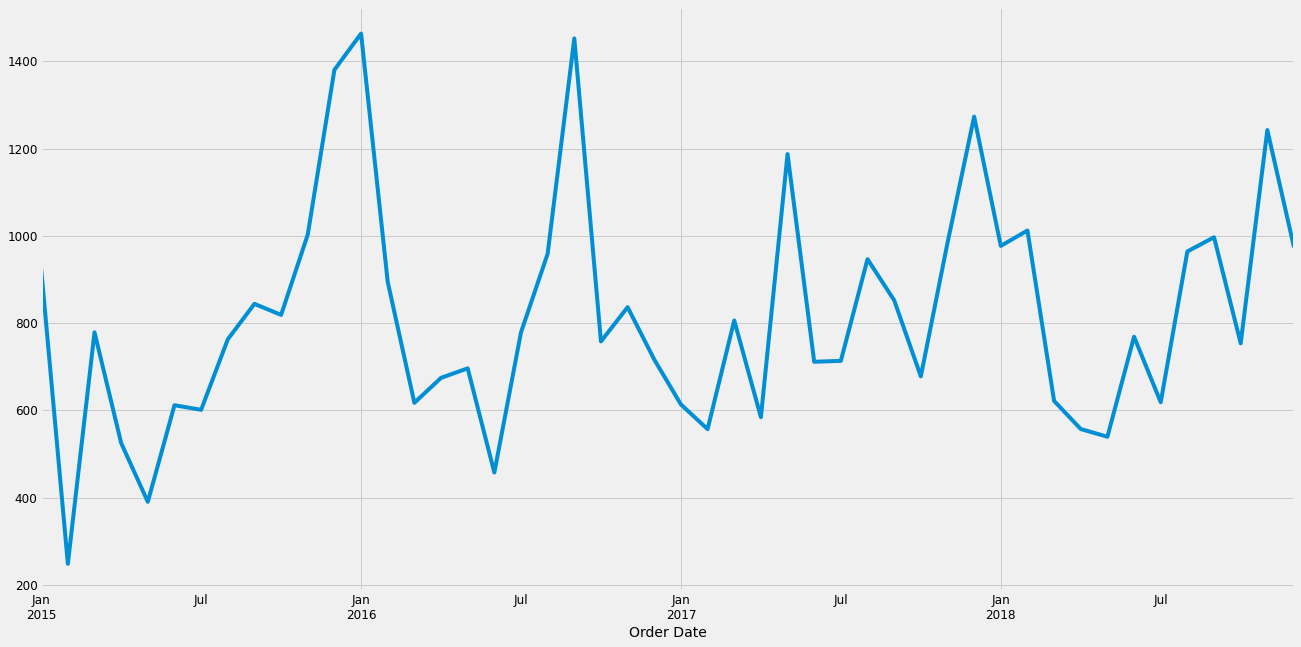

In [96]:
data.plot(figsize=(20,10))
plt.show()

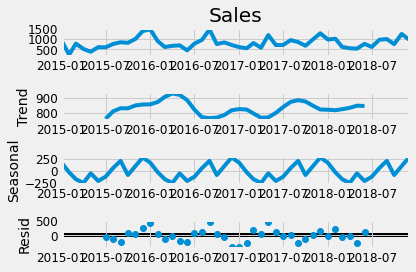

<Figure size 800x1600 with 0 Axes>

In [102]:

decomposition = sm.tsa.seasonal_decompose(data, model='additive')
fig = decomposition.plot()
figure(figsize=(10, 20), dpi=80)
plt.show()